## Sourcing the Zillow database as the data source, create a jupyter notebook named `explore_zillow` and do the following:

<a id='top'></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

#functions
import acquire as acq
import wrangle_zillow as wz
import explore as exp



warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = wz.wrangle_zillow()

In [3]:
df.head()

bathrooms  bedrooms  buildingqualitytypeid  \
parcelid                                               
10711855        2.0         3                      8   
10711877        2.0         4                      8   
10711888        2.0         4                      8   
10711910        2.0         3                      8   
10711923        2.0         4                      8   

          calculatedfinishedsquarefeet  fips    latitude    longitude  \
parcelid                                                                
10711855                        2107.0  6037  34222559.0 -118617387.0   
10711877                        1882.0  6037  34220261.0 -118616409.0   
10711888                        1882.0  6037  34222491.0 -118616854.0   
10711910                        1477.0  6037  34221864.0 -118615739.0   
10711923                        1918.0  6037  34220619.0 -118615253.0   

          lotsizesquarefeet  rawcensustractandblock  regionidcity  ...  \
parcelid                                                           ...   
10711855             9158.0            6.037113e+07       12447.0  ...   
10711877             9035.0            6.037113e+07       12447.0  ...   
10711888             9800.0            6.037113e+07       12447.0  ...   
10711910            11285.0            6.037113e+07       12447.0  ...   
10711923            11239.0            6.037113e+07       12447.0  ...   

          assessmentyear  landtaxvaluedollarcnt  taxamount  zestimateerror  \
parcelid                                                                     
10711855            2016               374484.0    7659.36       -0.007357   
10711877            2016               407000.0    8123.91        0.021066   
10711888            2016               285332.0    6673.24        0.077174   
10711910            2016                20063.0    1116.46       -0.041238   
10711923            2016               247590.0    5239.85       -0.009496   

          transactiondate  heatingorsystemdesc  propertylandusetypeid  county  \
parcelid                                                                        
10711855       2017-07-07              Central                    261       0   
10711877       2017-08-29              Central                    261       0   
10711888       2017-04-04              Central                    261       0   
10711910       2017-03-17              Central                    261       0   
10711923       2017-03-24              Central                    261       0   

          home_age  zerror_qrtls  
parcelid                          
10711855        49            q2  
10711877        49            q3  
10711888        49            q4  
10711910        61            q1  
10711923        61            q2  

[5 rows x 27 columns]

In [4]:
df.shape

(69571, 27)

In [5]:
df.groupby(['propertylandusetypeid.1']).count()

KeyError: 'propertylandusetypeid.1'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69571 entries, 10711855 to 162960814
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   bathrooms                     69571 non-null  float64 
 1   bedrooms                      69571 non-null  int64   
 2   buildingqualitytypeid         69571 non-null  int64   
 3   calculatedfinishedsquarefeet  69571 non-null  float64 
 4   fips                          69571 non-null  int64   
 5   latitude                      69571 non-null  float64 
 6   longitude                     69571 non-null  float64 
 7   lotsizesquarefeet             69571 non-null  float64 
 8   rawcensustractandblock        69571 non-null  float64 
 9   regionidcity                  69571 non-null  float64 
 10  regionidcounty                69571 non-null  int64   
 11  regionidzip                   69571 non-null  int64   
 12  roomcnt                       69571

In [6]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wz.train_validate_test(df, "zestimateerror")

In [7]:
X_train.shape, y_train.shape, X_validate.shape, y_validate.shape, X_test.shape, y_test.shape

((38959, 26), (38959,), (16697, 26), (16697,), (13915, 26), (13915,))

In [8]:
object_cols = wz.get_object_cols(df)
object_cols

['transactiondate', 'heatingorsystemdesc', 'county', 'zerror_qrtls']

In [9]:
numeric_cols = wz.get_numeric_X_cols(X_train, object_cols)
numeric_cols

['bathrooms',
 'bedrooms',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'fips',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'home_value',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'propertylandusetypeid',
 'home_age']

In [10]:
X_train_scaled, X_validate_scaled, X_test_scaled = wz.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [11]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

((38959, 22), (16697, 22), (13915, 22))

In [6]:
df, train, validate, test = wz.split_zillowdf(df)

In [7]:
df.head(2)

bathrooms  bedrooms  buildingqualitytypeid  \
parcelid                                               
10711855        2.0         3                      8   
10711877        2.0         4                      8   

          calculatedfinishedsquarefeet  fips    latitude    longitude  \
parcelid                                                                
10711855                        2107.0  6037  34222559.0 -118617387.0   
10711877                        1882.0  6037  34220261.0 -118616409.0   

          lotsizesquarefeet  rawcensustractandblock  regionidcity  ...  \
parcelid                                                           ...   
10711855             9158.0            6.037113e+07       12447.0  ...   
10711877             9035.0            6.037113e+07       12447.0  ...   

          assessmentyear  landtaxvaluedollarcnt  taxamount  zestimateerror  \
parcelid                                                                     
10711855            2016               374484.0    7659.36       -0.007357   
10711877            2016               407000.0    8123.91        0.021066   

          transactiondate  heatingorsystemdesc  propertylandusetypeid  county  \
parcelid                                                                        
10711855       2017-07-07              Central                    261       0   
10711877       2017-08-29              Central                    261       0   

          home_age  zerror_qrtls  
parcelid                          
10711855        49            q2  
10711877        49            q3  

[2 rows x 27 columns]

In [8]:
train.shape, df.shape

((38959, 43), (69571, 27))

In [9]:
train.head(2)

bathrooms  bedrooms  buildingqualitytypeid  \
parcelid                                               
12527764        2.0         3                      7   
11892135        2.0         3                      6   

          calculatedfinishedsquarefeet  fips    latitude    longitude  \
parcelid                                                                
12527764                        1429.0  6037  33758606.0 -118123624.0   
11892135                        1886.0  6037  34117424.0 -118096760.0   

          lotsizesquarefeet  rawcensustractandblock  regionidcity  ...  \
parcelid                                                           ...   
12527764             3091.0            6.037578e+07       46298.0  ...   
11892135            10727.0            6.037464e+07       54299.0  ...   

          regionidcity_scaled  roomcnt_scaled  bedrooms_scaled  \
parcelid                                                         
12527764             0.269442       -0.544906        -0.006859   
11892135             0.440020       -0.544906        -0.006859   

          home_age_scaled  yearbuilt_scaled  \
parcelid                                      
12527764         0.881200         -0.881200   
11892135         1.274057         -1.274057   

          structuretaxvaluedollarcnt_scaled  home_value_scaled  \
parcelid                                                         
12527764                           0.103270           0.825868   
11892135                          -0.313118           0.337382   

          assessmentyear_scaled  landtaxvaluedollarcnt_scaled  \
parcelid                                                        
12527764                    0.0                      1.099936   
11892135                    0.0                      0.643450   

          taxamount_scaled  
parcelid                    
12527764          0.799124  
11892135          0.549533  

[2 rows x 43 columns]

 [Jump to the bottom of Repo](#bottom)

# 1. Ask at least 5 questions about the data, keeping in mind that your target variable is `zestimateerror`. 

e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [10]:
# Create a list of variables to loop through visualizing & testing.
binary_vars = ['county']
categorical_vars = ['buildingqualitytypeid', 'fips', 'transactiondate', 
                    'regionidcounty', 'regionidzip', 'heatingorsystemdesc', 
                    'unitcnt', 'propertylandusetypeid']

quant_vars = ['bathrooms', 'calculatedfinishedsquarefeet', 'latitude',
              'longitude', 'lotsizesquarefeet', 'rawcensustractandblock', 
              'regionidcity', 'roomcnt','bedrooms', 'home_age', 'yearbuilt', 
              'structuretaxvaluedollarcnt', 'home_value', 'assessmentyear', 
              'landtaxvaluedollarcnt', 'taxamount']
categorical_target = 'zerror_qrtls'
continuous_target = 'zestimateerror'

In [13]:
X_train_scaled.head()

bathrooms  bedrooms  buildingqualitytypeid  \
17272061   0.166667      0.25               0.454545   
11093444   0.222222      0.25               0.545455   
12089715   0.000000      0.25               0.454545   
10773075   0.222222      0.25               0.636364   
11621077   0.000000      0.00               0.545455   

          calculatedfinishedsquarefeet  fips  latitude  longitude  \
17272061                      0.159944   1.0  0.582168   0.293710   
11093444                      0.236773   0.0  0.604116   0.505763   
12089715                      0.076923   0.0  0.539589   0.667846   
10773075                      0.090901   0.0  0.587814   0.474692   
11621077                      0.048124   0.0  0.491471   0.551419   

          lotsizesquarefeet  rawcensustractandblock  regionidcity  ...  \
17272061           0.000767                0.999959      0.078325  ...   
11093444           0.002168                0.000189      0.022785  ...   
12089715           0.000703                0.001086      0.022785  ...   
10773075           0.018500                0.000455      0.022785  ...   
11621077           0.007529                0.002227      0.022785  ...   

          roomcnt  unitcnt  yearbuilt  structuretaxvaluedollarcnt  home_value  \
17272061      0.5      0.0   0.847826                    0.095711    0.104081   
11093444      0.0      0.0   0.608696                    0.081218    0.156122   
12089715      0.0      0.0   0.326087                    0.022949    0.044365   
10773075      0.0      0.0   0.695652                    0.016217    0.013678   
11621077      0.0      0.0   0.688406                    0.038075    0.040917   

          assessmentyear  landtaxvaluedollarcnt  taxamount  \
17272061             0.0               0.043370   0.092356   
11093444             0.0               0.106799   0.156633   
12089715             0.0               0.031765   0.044365   
10773075             0.0               0.004818   0.016532   
11621077             0.0               0.017867   0.041853   

          propertylandusetypeid  home_age  
17272061                    0.0  0.152174  
11093444                    0.0  0.391304  
12089715                    0.0  0.673913  
10773075                    1.0  0.304348  
11621077                    1.0  0.311594  

[5 rows x 22 columns]

# Univariate Exploration

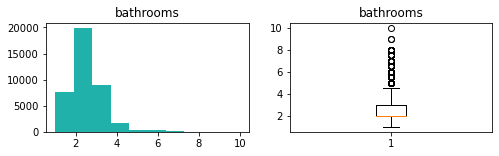

count    38959.000000
mean         2.259683
std          0.920226
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


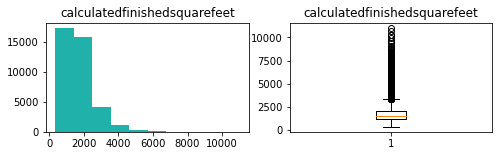

count    38959.000000
mean      1736.977207
std        876.766763
min        360.000000
25%       1166.000000
50%       1508.000000
75%       2056.000000
max      11020.000000
Name: calculatedfinishedsquarefeet, dtype: float64


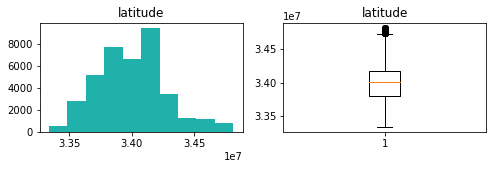

count    3.895900e+04
mean     3.400337e+07
std      2.686851e+05
min      3.333953e+07
25%      3.380556e+07
50%      3.401311e+07
75%      3.417433e+07
max      3.481240e+07
Name: latitude, dtype: float64


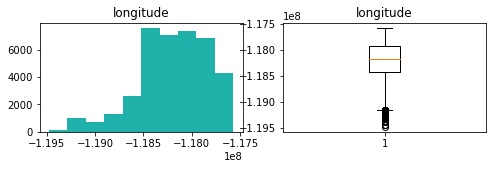

count    3.895900e+04
mean    -1.181941e+08
std      3.616466e+05
min     -1.194753e+08
25%     -1.184100e+08
50%     -1.181631e+08
75%     -1.179132e+08
max     -1.175724e+08
Name: longitude, dtype: float64


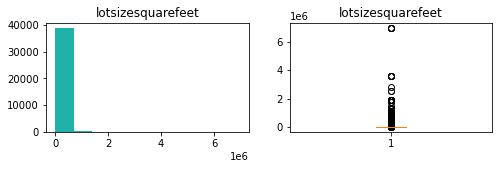

count    3.895900e+04
mean     2.828347e+04
std      1.228384e+05
min      2.360000e+02
25%      6.000000e+03
50%      7.314000e+03
75%      1.081750e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64


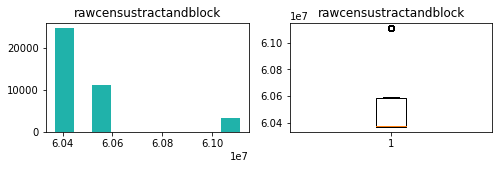

count    3.895900e+04
mean     6.049670e+07
std      2.069783e+05
min      6.037101e+07
25%      6.037312e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


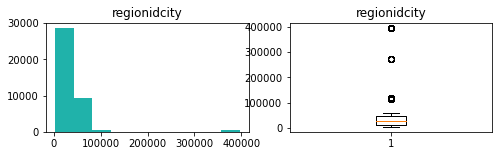

count     38959.000000
mean      33811.856079
std       47359.555168
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64


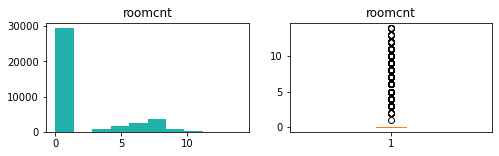

count    38959.000000
mean         1.604687
std          2.921016
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: roomcnt, dtype: float64


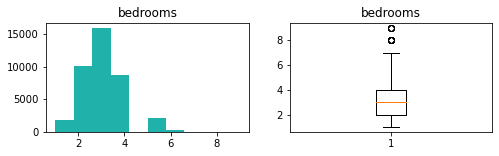

count    38959.000000
mean         3.010498
std          0.993959
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedrooms, dtype: float64


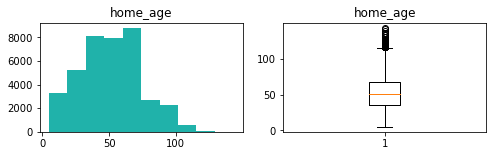

count    38959.000000
mean        51.874714
std         22.977101
min          5.000000
25%         35.000000
50%         51.000000
75%         67.000000
max        143.000000
Name: home_age, dtype: float64


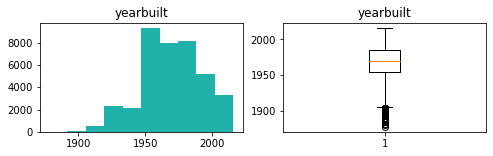

count    38959.000000
mean      1969.125286
std         22.977101
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1986.000000
max       2016.000000
Name: yearbuilt, dtype: float64


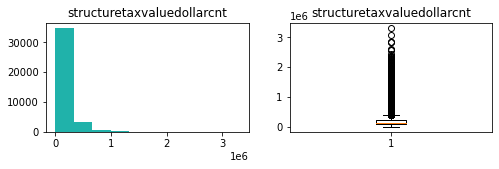

count    3.895900e+04
mean     1.819658e+05
std      1.830560e+05
min      4.400000e+01
25%      8.373550e+04
50%      1.340000e+05
75%      2.134695e+05
max      3.316500e+06
Name: structuretaxvaluedollarcnt, dtype: float64


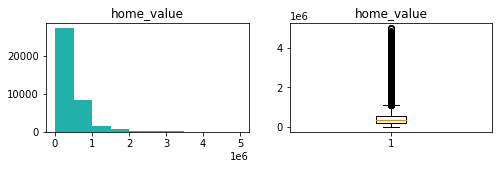

count    3.895900e+04
mean     4.682838e+05
std      4.627386e+05
min      1.050400e+04
25%      2.020900e+05
50%      3.557060e+05
75%      5.627715e+05
max      4.993132e+06
Name: home_value, dtype: float64


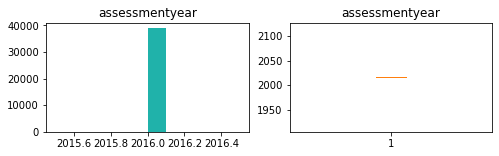

count    38959.0
mean      2016.0
std          0.0
min       2016.0
25%       2016.0
50%       2016.0
75%       2016.0
max       2016.0
Name: assessmentyear, dtype: float64


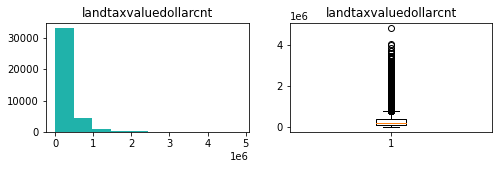

count    3.895900e+04
mean     2.863180e+05
std      3.291203e+05
min      1.479000e+03
25%      8.181350e+04
50%      2.033720e+05
75%      3.660000e+05
max      4.847224e+06
Name: landtaxvaluedollarcnt, dtype: float64


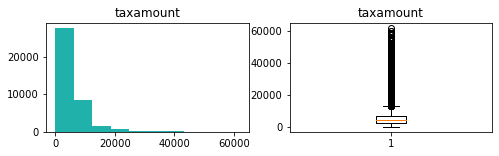

count    38959.000000
mean      5709.333646
std       5371.303846
min         51.260000
25%       2666.310000
50%       4389.740000
75%       6776.150000
max      61992.630000
Name: taxamount, dtype: float64


In [16]:
exp.explore_univariate(X_train, binary_vars, quant_vars)

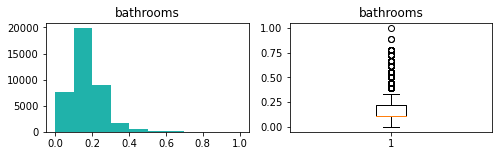

count    38959.000000
mean         0.139965
std          0.102247
min          0.000000
25%          0.111111
50%          0.111111
75%          0.222222
max          1.000000
Name: bathrooms, dtype: float64


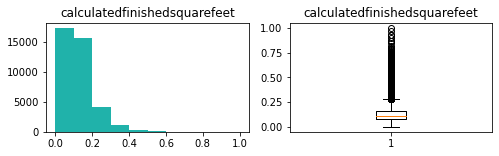

count    38959.000000
mean         0.129172
std          0.082248
min          0.000000
25%          0.075610
50%          0.107692
75%          0.159099
max          1.000000
Name: calculatedfinishedsquarefeet, dtype: float64


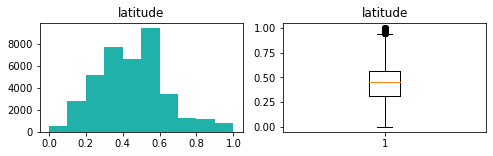

count    38959.000000
mean         0.450715
std          0.182423
min          0.000000
25%          0.316410
50%          0.457325
75%          0.566784
max          1.000000
Name: latitude, dtype: float64


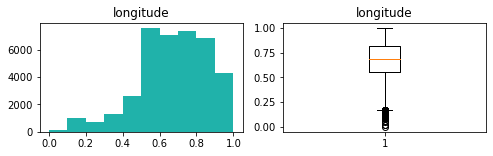

count    38959.000000
mean         0.673289
std          0.190056
min          0.000000
25%          0.559828
50%          0.689558
75%          0.820929
max          1.000000
Name: longitude, dtype: float64


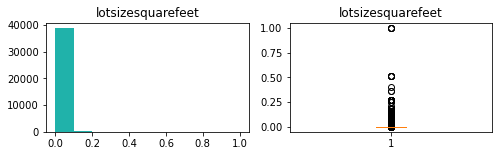

count    38959.000000
mean         0.004024
std          0.017622
min          0.000000
25%          0.000827
50%          0.001015
75%          0.001518
max          1.000000
Name: lotsizesquarefeet, dtype: float64


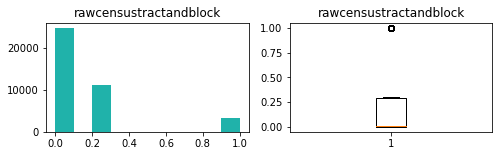

count    38959.000000
mean         0.170058
std          0.280049
min          0.000000
25%          0.002851
50%          0.007032
75%          0.297009
max          1.000000
Name: rawcensustractandblock, dtype: float64


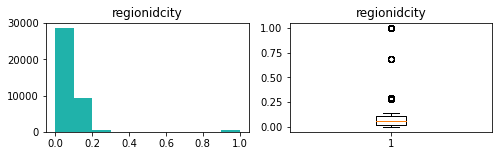

count    38959.000000
mean         0.077140
std          0.120488
min          0.000000
25%          0.022785
50%          0.055276
75%          0.106766
max          1.000000
Name: regionidcity, dtype: float64


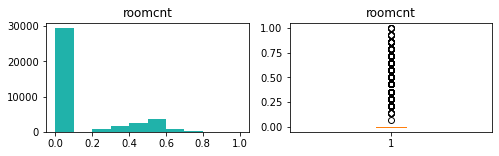

count    38959.000000
mean         0.114620
std          0.208644
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: roomcnt, dtype: float64


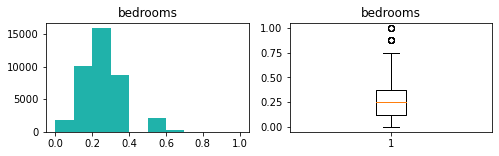

count    38959.000000
mean         0.251312
std          0.124245
min          0.000000
25%          0.125000
50%          0.250000
75%          0.375000
max          1.000000
Name: bedrooms, dtype: float64


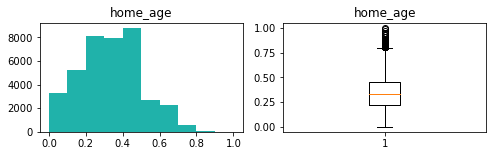

count    38959.000000
mean         0.339672
std          0.166501
min          0.000000
25%          0.217391
50%          0.333333
75%          0.449275
max          1.000000
Name: home_age, dtype: float64


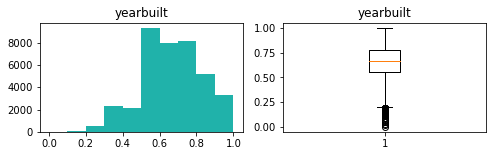

count    38959.000000
mean         0.660328
std          0.166501
min          0.000000
25%          0.550725
50%          0.666667
75%          0.782609
max          1.000000
Name: yearbuilt, dtype: float64


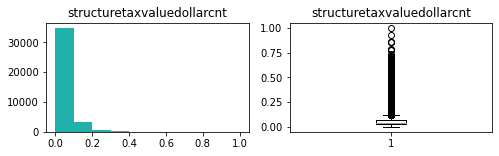

count    38959.000000
mean         0.054854
std          0.055196
min          0.000000
25%          0.025235
50%          0.040391
75%          0.064353
max          1.000000
Name: structuretaxvaluedollarcnt, dtype: float64


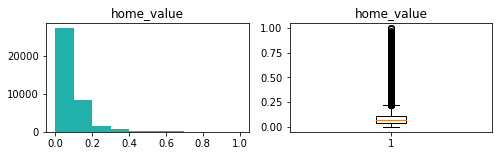

count    38959.000000
mean         0.091875
std          0.092870
min          0.000000
25%          0.038451
50%          0.069281
75%          0.110839
max          1.000000
Name: home_value, dtype: float64


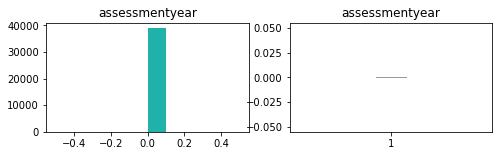

count    38959.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: assessmentyear, dtype: float64


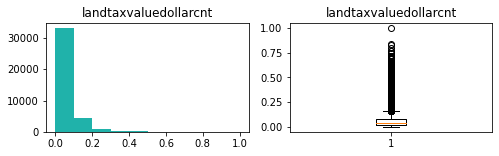

count    38959.000000
mean         0.058781
std          0.067919
min          0.000000
25%          0.016578
50%          0.041664
75%          0.075225
max          1.000000
Name: landtaxvaluedollarcnt, dtype: float64


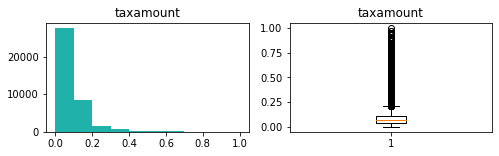

count    38959.000000
mean         0.091346
std          0.086716
min          0.000000
25%          0.042218
50%          0.070042
75%          0.108569
max          1.000000
Name: taxamount, dtype: float64


In [15]:
exp.explore_univariate(X_train_scaled, binary_vars, quant_vars)

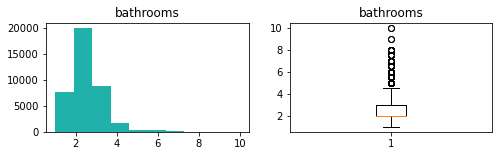

count    38959.000000
mean         2.254498
std          0.916885
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bathrooms, dtype: float64


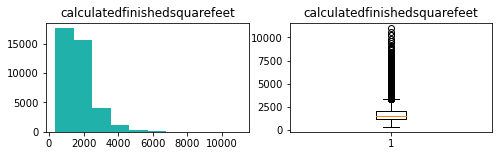

count    38959.000000
mean      1733.373470
std        874.948743
min        372.000000
25%       1165.000000
50%       1506.000000
75%       2046.000000
max      11020.000000
Name: calculatedfinishedsquarefeet, dtype: float64


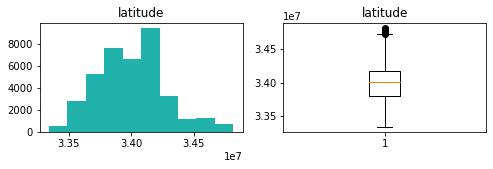

count    3.895900e+04
mean     3.400209e+07
std      2.679486e+05
min      3.333953e+07
25%      3.380239e+07
50%      3.401324e+07
75%      3.417373e+07
max      3.481877e+07
Name: latitude, dtype: float64


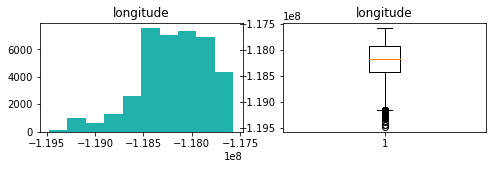

count    3.895900e+04
mean    -1.181926e+08
std      3.604109e+05
min     -1.194753e+08
25%     -1.184099e+08
50%     -1.181620e+08
75%     -1.179118e+08
max     -1.175724e+08
Name: longitude, dtype: float64


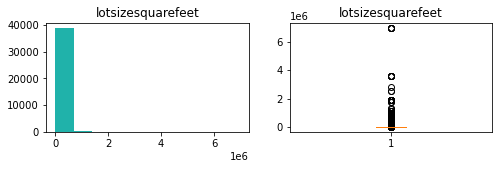

count    3.895900e+04
mean     2.836822e+04
std      1.268736e+05
min      2.360000e+02
25%      6.000000e+03
50%      7.314000e+03
75%      1.077050e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64


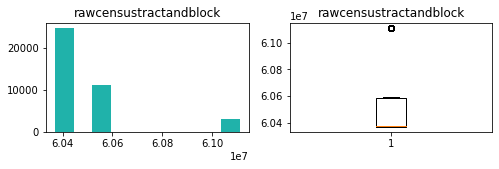

count    3.895900e+04
mean     6.049553e+07
std      2.059902e+05
min      6.037101e+07
25%      6.037312e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64


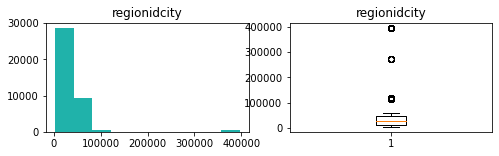

count     38959.000000
mean      33659.750481
std       46905.839874
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64


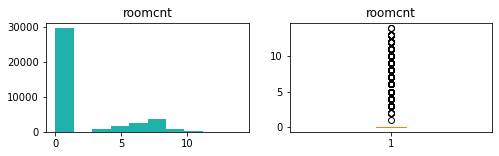

count    38959.000000
mean         1.582998
std          2.905123
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         14.000000
Name: roomcnt, dtype: float64


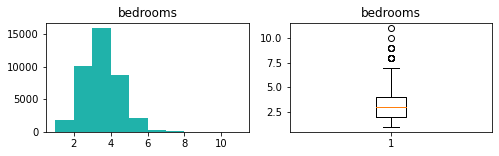

count    38959.000000
mean         3.006828
std          0.995423
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


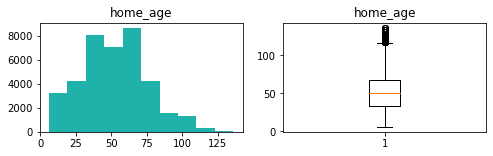

count    38959.000000
mean        51.812495
std         22.909403
min          6.000000
25%         34.000000
50%         51.000000
75%         67.000000
max        136.000000
Name: home_age, dtype: float64


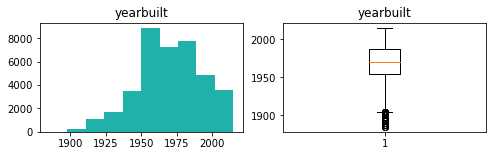

count    38959.000000
mean      1969.187505
std         22.909403
min       1885.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64


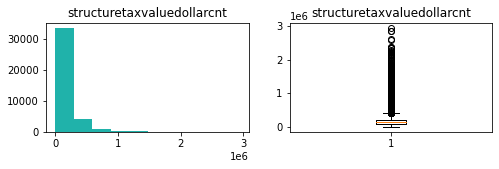

count    3.895900e+04
mean     1.813341e+05
std      1.807520e+05
min      1.320000e+02
25%      8.319200e+04
50%      1.337730e+05
75%      2.132060e+05
max      2.943209e+06
Name: structuretaxvaluedollarcnt, dtype: float64


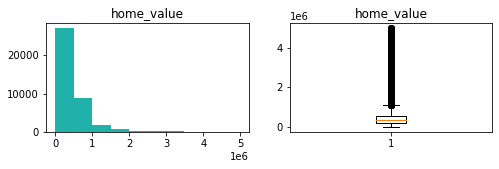

count    3.895900e+04
mean     4.674120e+05
std      4.632616e+05
min      3.254000e+03
25%      2.025425e+05
50%      3.547170e+05
75%      5.632920e+05
max      4.984456e+06
Name: home_value, dtype: float64


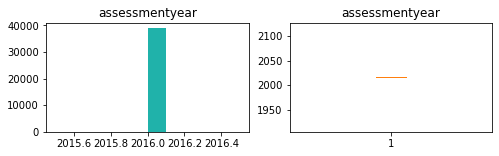

count    38959.0
mean      2016.0
std          0.0
min       2016.0
25%       2016.0
50%       2016.0
75%       2016.0
max       2016.0
Name: assessmentyear, dtype: float64


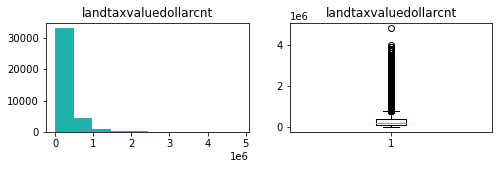

count    3.895900e+04
mean     2.860779e+05
std      3.308617e+05
min      1.610000e+02
25%      8.203050e+04
50%      2.030500e+05
75%      3.670910e+05
max      4.847224e+06
Name: landtaxvaluedollarcnt, dtype: float64


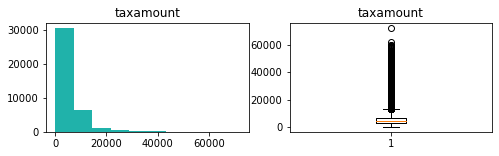

count    38959.000000
mean      5701.071689
std       5383.051400
min         61.820000
25%       2664.800000
50%       4375.700000
75%       6764.990000
max      72122.200000
Name: taxamount, dtype: float64


In [13]:
exp.explore_univariate(train, binary_vars, quant_vars)

# Bivariate Exploration

bathrooms 
____________________



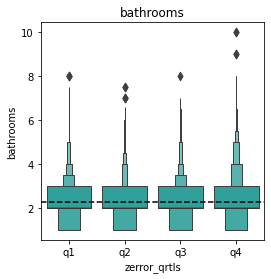

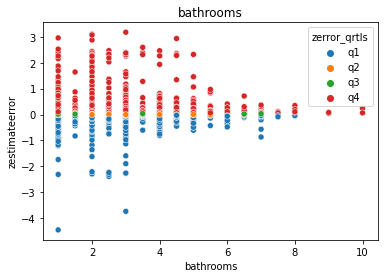

zerror_qrtls           q1           q2           q3           q4
count         9726.000000  9757.000000  9760.000000  9716.000000
mean             2.157722     2.232653     2.280891     2.346799
std              0.911907     0.817587     0.853867     1.056422
min              1.000000     1.000000     1.000000     1.000000
25%              2.000000     2.000000     2.000000     2.000000
50%              2.000000     2.000000     2.000000     2.000000
75%              3.000000     3.000000     3.000000     3.000000
max              8.000000     7.500000     8.000000    10.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.06433616506966192, pvalue=5.107420377253513e-37)

____________________

calculatedfinishedsquarefeet 
____________________



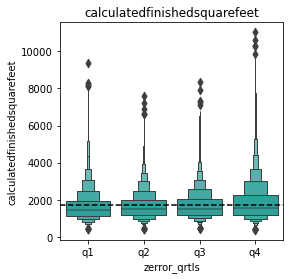

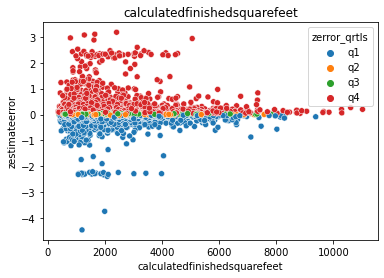

zerror_qrtls           q1           q2           q3            q4
count         9726.000000  9757.000000  9760.000000   9716.000000
mean          1661.555110  1671.593420  1723.429508   1877.295492
std            843.317781   754.159438   795.112231   1059.203038
min            419.000000   418.000000   400.000000    372.000000
25%           1125.000000  1164.000000  1193.000000   1187.000000
50%           1450.000000  1487.000000  1528.000000   1576.000000
75%           1933.000000  1988.000000  2043.000000   2248.000000
max           9382.000000  7577.000000  8322.000000  11020.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.07431424538877822, pvalue=7.693751100330569e-49)

____________________

latitude 
____________________



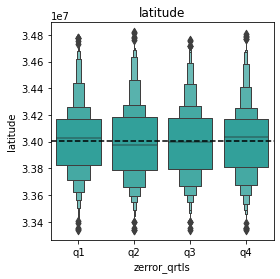

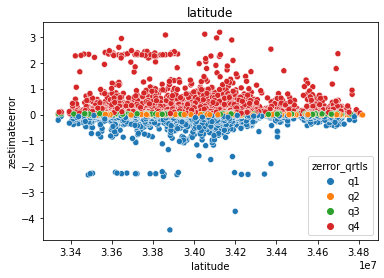

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          3.401524e+07  3.399573e+07  3.399571e+07  3.400174e+07
std           2.588763e+05  2.812356e+05  2.694660e+05  2.611541e+05
min           3.333960e+07  3.333953e+07  3.334066e+07  3.334122e+07
25%           3.382860e+07  3.378526e+07  3.379507e+07  3.380963e+07
50%           3.403006e+07  3.397932e+07  3.399622e+07  3.403277e+07
75%           3.417171e+07  3.418401e+07  3.417475e+07  3.416771e+07
max           3.477938e+07  3.481877e+07  3.476091e+07  3.480696e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.012317451870652155, pvalue=0.01504736426327398)

____________________

longitude 
____________________



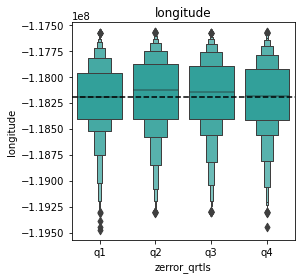

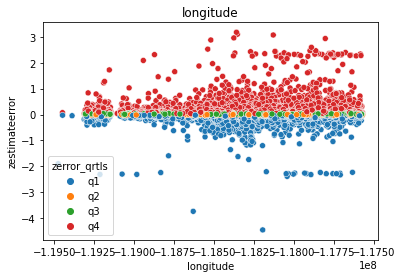

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean         -1.182096e+08 -1.181737e+08 -1.181813e+08 -1.182060e+08
std           3.358537e+05  3.774484e+05  3.683328e+05  3.573113e+05
min          -1.194753e+08 -1.193104e+08 -1.193048e+08 -1.194484e+08
25%          -1.184025e+08 -1.184075e+08 -1.184114e+08 -1.184197e+08
50%          -1.181920e+08 -1.181268e+08 -1.181431e+08 -1.181862e+08
75%          -1.179610e+08 -1.178772e+08 -1.178921e+08 -1.179252e+08
max          -1.175762e+08 -1.175724e+08 -1.175749e+08 -1.175728e+08 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.00626280009595801, pvalue=0.21641169726401424)

____________________

lotsizesquarefeet 
____________________



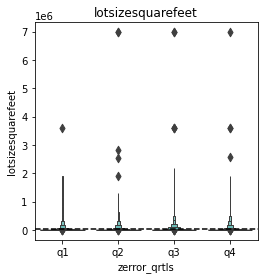

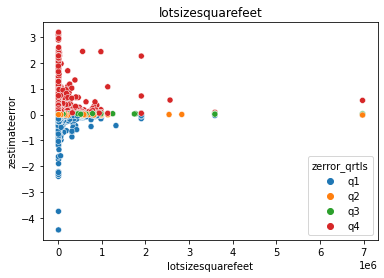

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          2.756805e+04  2.779774e+04  3.002391e+04  2.807894e+04
std           9.786821e+04  1.342013e+05  1.452237e+05  1.252465e+05
min           2.360000e+02  4.350000e+02  4.350000e+02  4.350000e+02
25%           6.002250e+03  5.990000e+03  6.000000e+03  6.012000e+03
50%           7.314000e+03  7.314000e+03  7.314000e+03  7.314000e+03
75%           1.092000e+04  9.828000e+03  1.018400e+04  1.248000e+04
max           3.589145e+06  6.971010e+06  6.971010e+06  6.971010e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01196209815501575, pvalue=0.018221221762853863)

____________________

rawcensustractandblock 
____________________



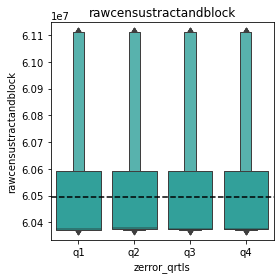

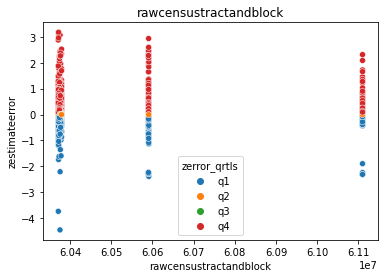

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          6.047781e+07  6.051377e+07  6.050213e+07  6.048830e+07
std           1.951568e+05  2.159582e+05  2.086984e+05  2.017404e+05
min           6.037101e+07  6.037101e+07  6.037101e+07  6.037101e+07
25%           6.037275e+07  6.037404e+07  6.037402e+07  6.037296e+07
50%           6.037572e+07  6.037901e+07  6.037651e+07  6.037599e+07
75%           6.059042e+07  6.059053e+07  6.059052e+07  6.059042e+07
max           6.111009e+07  6.111009e+07  6.111009e+07  6.111009e+07 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.009080393785330878, pvalue=0.07308961695322745)

____________________

regionidcity 
____________________



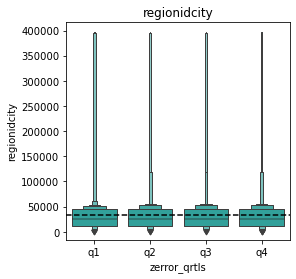

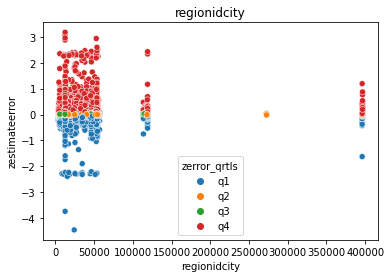

zerror_qrtls             q1             q2             q3             q4
count           9726.000000    9757.000000    9760.000000    9716.000000
mean           33929.890500   33497.777288   33939.340369   33271.133079
std            50166.128886   44955.444976   46444.663716   45900.628806
min             3491.000000    3491.000000    3491.000000    3491.000000
25%            12447.000000   12447.000000   12447.000000   12447.000000
50%            24812.000000   25458.000000   25218.000000   24832.000000
75%            45457.000000   45398.000000   45457.000000   45457.000000
max           396556.000000  396556.000000  396556.000000  396556.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.012995360615029195, pvalue=0.010315952768867058)

____________________

roomcnt 
____________________



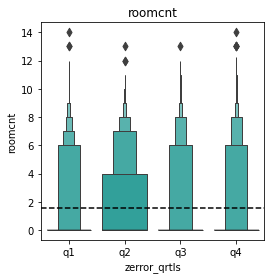

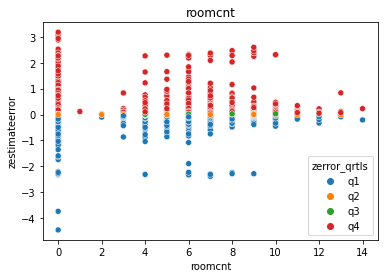

zerror_qrtls           q1           q2           q3           q4
count         9726.000000  9757.000000  9760.000000  9716.000000
mean             1.406231     1.712412     1.621721     1.591087
std              2.765263     2.976074     2.930898     2.935372
min              0.000000     0.000000     0.000000     0.000000
25%              0.000000     0.000000     0.000000     0.000000
50%              0.000000     0.000000     0.000000     0.000000
75%              0.000000     4.000000     0.000000     0.000000
max             14.000000    13.000000    13.000000    14.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.017725282933759544, pvalue=0.00046738325350481933)

____________________

bedrooms 
____________________



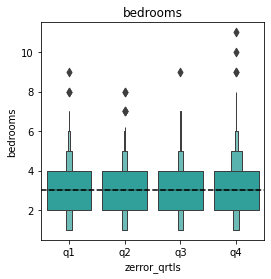

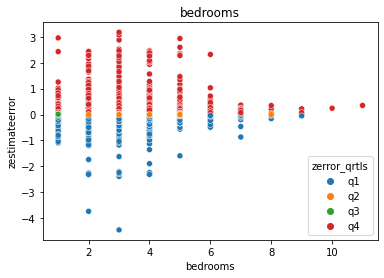

zerror_qrtls           q1           q2           q3           q4
count         9726.000000  9757.000000  9760.000000  9716.000000
mean             2.931010     2.990263     3.023668     3.082441
std              0.972248     0.954805     0.976071     1.068954
min              1.000000     1.000000     1.000000     1.000000
25%              2.000000     2.000000     2.000000     2.000000
50%              3.000000     3.000000     3.000000     3.000000
75%              4.000000     4.000000     4.000000     4.000000
max              9.000000     8.000000     9.000000    11.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.05046487439199799, pvalue=2.1296967458853573e-23)

____________________

home_age 
____________________



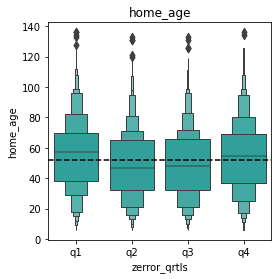

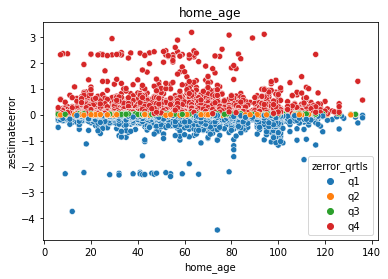

zerror_qrtls           q1           q2           q3           q4
count         9726.000000  9757.000000  9760.000000  9716.000000
mean            55.816780    48.410167    49.010041    54.035920
std             23.446605    21.629504    22.199597    23.430142
min              6.000000     6.000000     6.000000     6.000000
25%             38.000000    32.000000    32.000000    37.000000
50%             57.000000    47.000000    48.000000    55.000000
75%             70.000000    65.000000    66.000000    69.000000
max            136.000000   133.000000   133.000000   136.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=-0.02569066384337841, pvalue=3.946791382632327e-07)

____________________

yearbuilt 
____________________



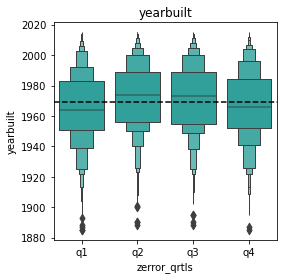

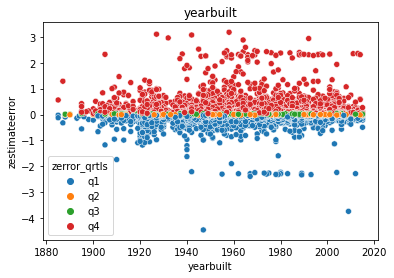

zerror_qrtls           q1           q2           q3           q4
count         9726.000000  9757.000000  9760.000000  9716.000000
mean          1965.183220  1972.589833  1971.989959  1966.964080
std             23.446605    21.629504    22.199597    23.430142
min           1885.000000  1888.000000  1888.000000  1885.000000
25%           1951.000000  1956.000000  1955.000000  1952.000000
50%           1964.000000  1974.000000  1973.000000  1966.000000
75%           1983.000000  1989.000000  1989.000000  1984.000000
max           2015.000000  2015.000000  2015.000000  2015.000000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02569066384337841, pvalue=3.946791382632327e-07)

____________________

structuretaxvaluedollarcnt 
____________________



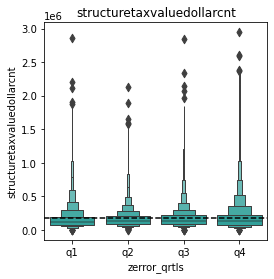

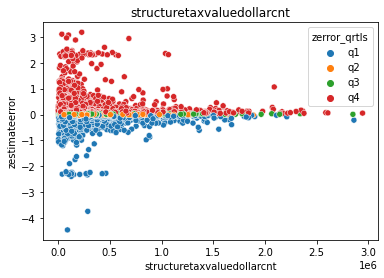

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          1.732095e+05  1.719288e+05  1.809584e+05  1.992894e+05
std           1.773415e+05  1.415651e+05  1.659942e+05  2.263862e+05
min           3.282000e+03  8.960000e+02  1.015000e+03  1.320000e+02
25%           7.806075e+04  8.843400e+04  8.877050e+04  7.786650e+04
50%           1.260820e+05  1.362980e+05  1.395535e+05  1.329985e+05
75%           2.012722e+05  2.087690e+05  2.172362e+05  2.298730e+05
max           2.860000e+06  2.130000e+06  2.850190e+06  2.943209e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.02705204578259654, pvalue=9.276832431141019e-08)

____________________

home_value 
____________________



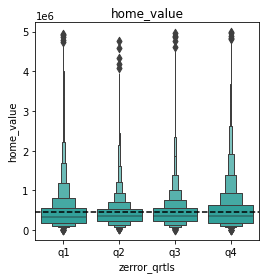

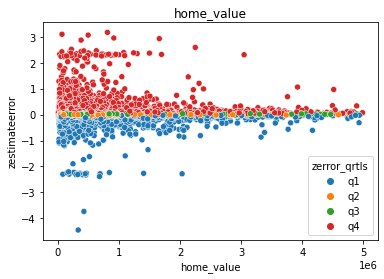

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          4.636410e+05  4.344259e+05  4.574513e+05  5.143179e+05
std           4.844984e+05  3.608662e+05  4.182972e+05  5.618575e+05
min           1.361600e+04  1.961600e+04  1.050400e+04  3.254000e+03
25%           1.893908e+05  2.184460e+05  2.182778e+05  1.848648e+05
50%           3.369655e+05  3.618900e+05  3.665770e+05  3.489265e+05
75%           5.478222e+05  5.430000e+05  5.583870e+05  6.218918e+05
max           4.932794e+06  4.771675e+06  4.961367e+06  4.984456e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.018351687212898815, pvalue=0.0002918246050399949)

____________________

assessmentyear 
____________________



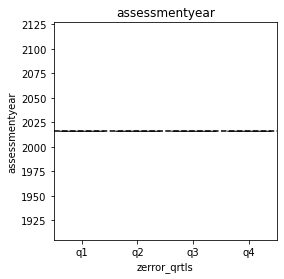

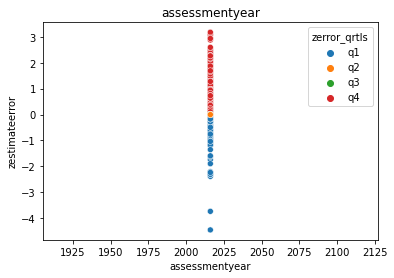

zerror_qrtls      q1      q2      q3      q4
count         9726.0  9757.0  9760.0  9716.0
mean          2016.0  2016.0  2016.0  2016.0
std              0.0     0.0     0.0     0.0
min           2016.0  2016.0  2016.0  2016.0
25%           2016.0  2016.0  2016.0  2016.0
50%           2016.0  2016.0  2016.0  2016.0
75%           2016.0  2016.0  2016.0  2016.0
max           2016.0  2016.0  2016.0  2016.0 


Spearman's Correlation Test:
 SpearmanrResult(correlation=nan, pvalue=nan)

____________________

landtaxvaluedollarcnt 
____________________



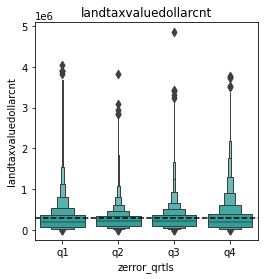

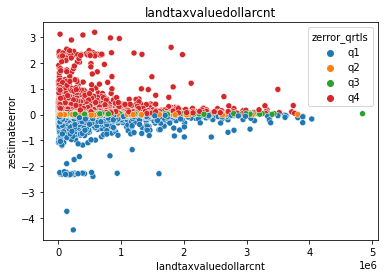

zerror_qrtls            q1            q2            q3            q4
count         9.726000e+03  9.757000e+03  9.760000e+03  9.716000e+03
mean          2.904315e+05  2.624971e+05  2.764929e+05  3.150286e+05
std           3.564125e+05  2.611784e+05  2.966985e+05  3.916411e+05
min           1.196000e+03  5.152000e+03  3.906000e+03  1.610000e+02
25%           7.570500e+04  9.112600e+04  9.023625e+04  7.248600e+04
50%           1.933495e+05  2.090960e+05  2.095260e+05  1.982060e+05
75%           3.649262e+05  3.514200e+05  3.622892e+05  3.995632e+05
max           4.038200e+06  3.817340e+06  4.847224e+06  3.764700e+06 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.008496310140023873, pvalue=0.09354618335327779)

____________________

taxamount 
____________________



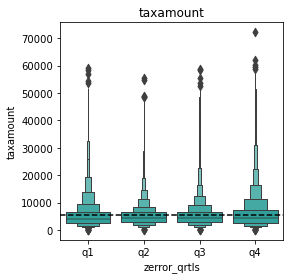

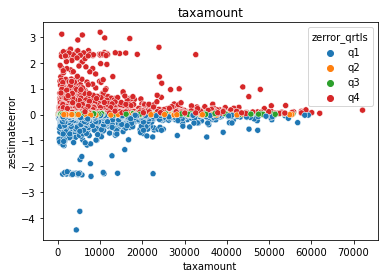

zerror_qrtls            q1            q2            q3            q4
count          9726.000000   9757.000000   9760.000000   9716.000000
mean           5646.537953   5329.814773   5600.952389   6229.057817
std            5569.333492   4238.380816   4879.219707   6539.671921
min             202.120000    139.590000     61.820000    207.200000
25%            2541.115000   2838.480000   2814.637500   2435.560000
50%            4192.145000   4448.720000   4520.805000   4316.280000
75%            6585.475000   6518.360000   6752.072500   7438.342500
max           59284.110000  55393.190000  58634.770000  72122.200000 


Spearman's Correlation Test:
 SpearmanrResult(correlation=0.01674645395963882, pvalue=0.0009479135570832754)

____________________



In [14]:
exp.explore_bivariate(train, categorical_target, continuous_target, binary_vars, quant_vars)

# Multivariate Exploration

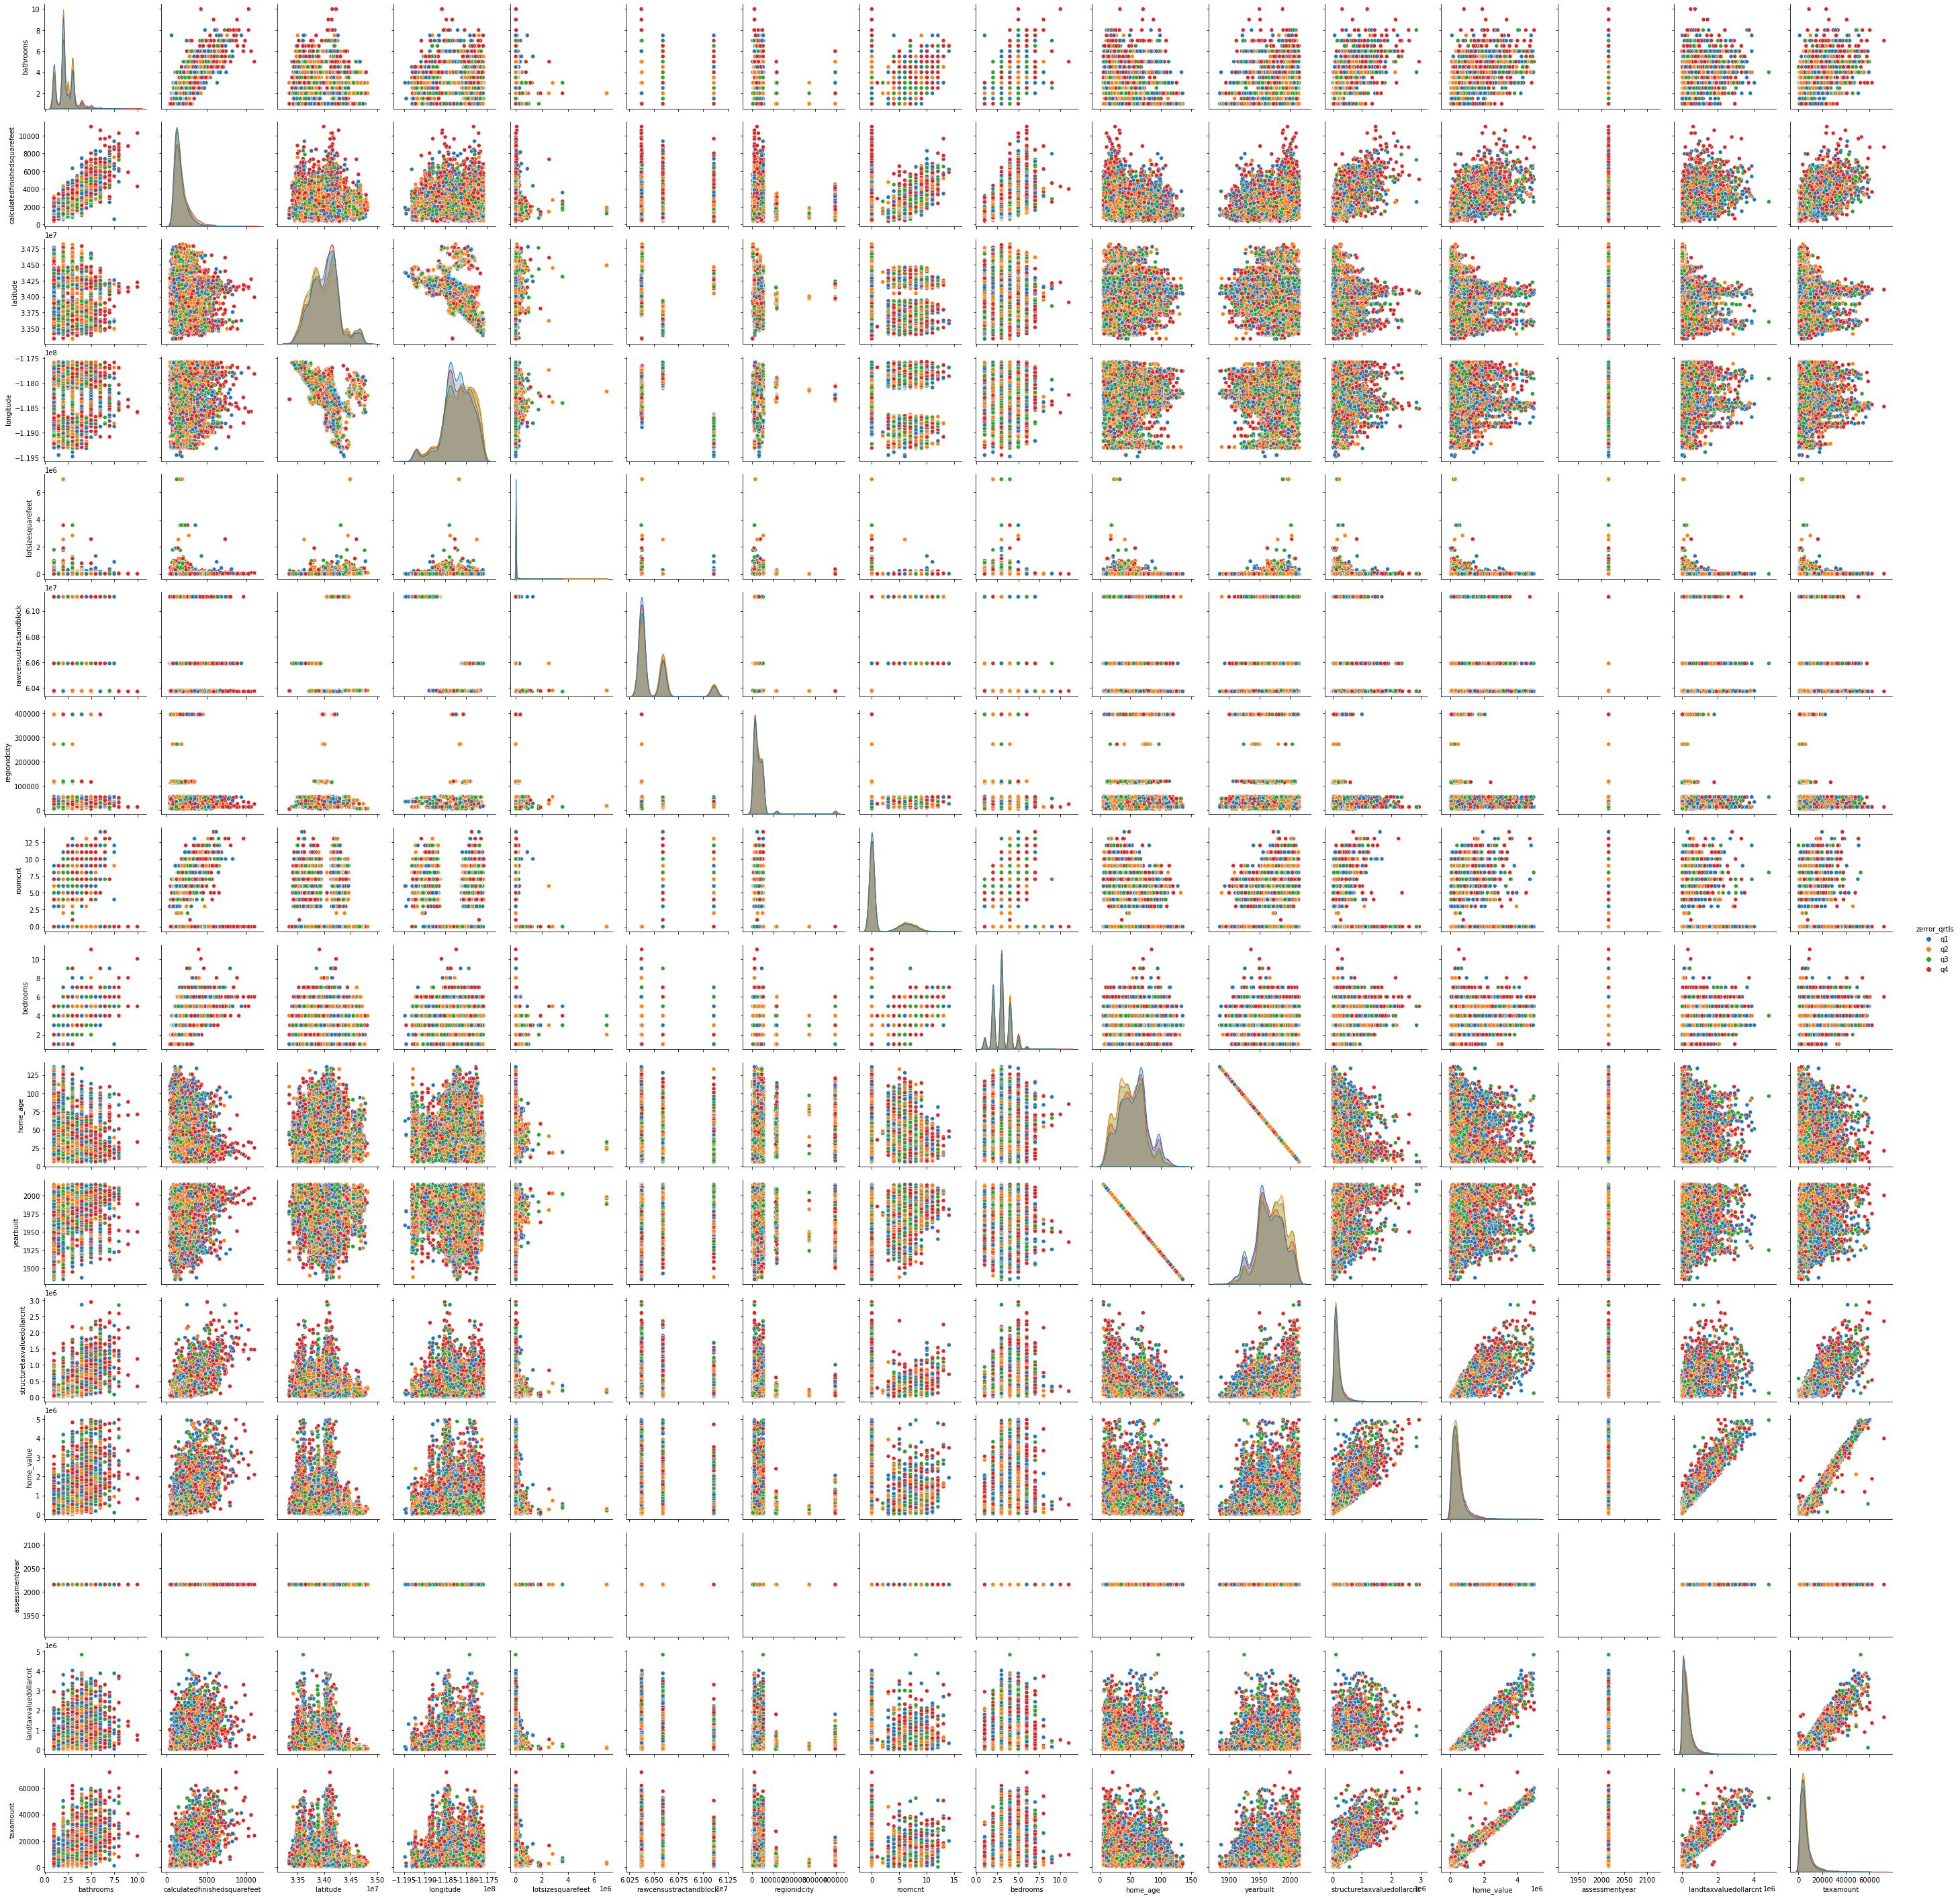

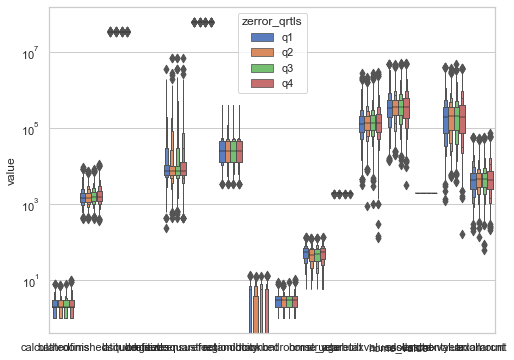

In [11]:
for var in binary_vars:
    exp.explore_multivariate(train, categorical_target, var, quant_vars)

<a id='bottom'></a>

 [Jump to the top of Repo](#top)

# 2. Answer those questions through a mix of statistical tests and visualizations.

 [Jump to the top of Repo](#top)

# Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

 [Jump to the top of Repo](#top)